In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.1.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sequential API를 사용하여 이미지 분류기 만들기

In [5]:
# fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
# 검증셋을 나눠주기 + 각 픽셀을 255로 나눠 스케일 맞추기(정수형으로 되어있기에 실수타입이 되도록 255.0으로 나눠준다.)
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [8]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names[y_train[0]]

'Coat'

## 신경망 구성

In [9]:
# Sequential 모델을 만든다. 순서대로 연결된 층을 일렬로 쌓아 구성
model = keras.models.Sequential()

# 첫 번째 층을 만들고 모델에 추가. Flatten층은 입력 이미지를 1D 배열로 변환(X를 입력받으면 X.reshape(-1,1)을 계산)
model.add(keras.layers.Flatten(input_shape=[28,28]))

# 뉴런 300개를 가진 Dense 은닉층, 가중치 행렬을 관리. 편향 역시 벡터로 관리
model.add(keras.layers.Dense(300,activation='relu'))

model.add(keras.layers.Dense(100,activation='relu'))

# 10개의 뉴런을 가진 Dense 출력층. 배타적인 클래스이므로 소프트맥스 활성화 함수
model.add(keras.layers.Dense(10,activation='softmax'))

# activation='relu'와 activation=keras.activations.relu는 동일

In [10]:
# 위에서 처럼 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있다.
'''model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])'''


"model = keras.models.Sequential([\n    keras.layers.Flatten(input_shape=[28,28]),\n    keras.layers.Dense(300,activation='relu'),\n    keras.layers.Dense(100,activation='relu'),\n    keras.layers.Dense(10,activation='softmax')\n])"

In [11]:
# summary 메서드는 모델에 있는 모든 층을 출력, 
# 층의 이름(지정하지 않으면 자동 생성), 출력 크기(None은 어떤 값도 가능하다는 의미), 파라미터 개수(훈련된/훈련되지 않은)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Dense 층은 보통 많은 파라미터를 갖는다. 예를 들어 첫 번째 은닉층은 784 $*$ 300개의 연결 가중치와 300개의 편향을 갖는다.

In [12]:
model.layers

In [13]:
model.layers[1].name

'dense'

In [14]:
model.get_layer('dense') is model.layers[1]

True

In [15]:
# 층의 모든 파라미터 get_weights() 메서드와 set_weights() 메서드를 사용
weights, biases = model.layers[1].get_weights()

print(weights.shape, biases.shape)

(784, 300) (300,)


In [16]:
# 초기값은 랜덤 생성
weights

array([[-0.00710981, -0.01924034,  0.02872763, ..., -0.01799007,
        -0.04818275,  0.06534488],
       [-0.01813029,  0.02275556,  0.06764273, ..., -0.00759526,
         0.06813465, -0.05018887],
       [ 0.01659564,  0.042197  ,  0.0059118 , ..., -0.01761984,
         0.01273237, -0.01192956],
       ...,
       [ 0.06856352,  0.05677265,  0.0054921 , ..., -0.00972063,
         0.0670988 , -0.00762928],
       [ 0.01269901,  0.04947313, -0.04431393, ..., -0.03295083,
        -0.05193832,  0.03092962],
       [-0.02280881,  0.01902147,  0.05711229, ..., -0.02241674,
         0.02507134,  0.07179983]], dtype=float32)

In [17]:
# 처음에는 0으로 초기화
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Dense 층은 대칭성을 깨뜨리기 위해 연결 가중치를 무작위로 초기화한다. 편향은 0으로 초기화한다.

다른 초기화 방법을 사용하고 싶으면 kernel_initializer와 bias_initializer 매개변수를 설정할 수 있다.(11장)

## 모델 컴파일

In [18]:
# keras.losses.sparse_categorical_crossentropy를 사용하는 것과 동일
# keras.optimizers.SGD()와 동일
# [keras.metrics.sparse_categorical_accuracy]와 동일

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

레이블이 정수 하나로 이루어져 있고 클래스가 배타적이므로 "sparse_categorical_crossentropy" 손실을 사용<br>
(샘플마다 클래스별 확률을 가지고 있다면 "categorical_crossentropy" 손실을 사용)

이진 분류를 사용한다면 출력층에 "softmax" 함수 대신 "sigmoid" 함수를 사용하고 "binary_crossentropy" 손실을 사용한다.

tip) 희소한 레이블을 원-핫 벡터 레이블로 변환하려면 keras.utils.to_categorical()함수 사용, 그 반대는 np.argmax(axis=1)

"sgd"는 확률적 경사하강법을 사용하여 모델을 훈련한다는 의미. 후진 모드 자동 미분과 경사 하강법을 수행<br>
(SGD를 사용할 때는 학습률 튜닝이 중요, 기본 학습률(lr 파라미터)은 0.01)

## 모델 훈련과 평가

In [19]:
history = model.fit(X_train,y_train,epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.7095 - accuracy: 0.7696 - val_loss: 0.5030 - val_accuracy: 0.8300
Epoch 2/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.4841 - accuracy: 0.8305 - val_loss: 0.5189 - val_accuracy: 0.8092
Epoch 3/10
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4408 - accuracy: 0.8449 - val_loss: 0.4357 - val_accuracy: 0.8460
Epoch 4/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.4122 - accuracy: 0.8547 - val_loss: 0.4109 - val_accuracy: 0.8532
Epoch 5/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3916 - accuracy: 0.8623 - val_loss: 0.3764 - val_accuracy: 0.8702
Epoch 6/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.3766 - accuracy: 0.8674 - val_loss: 0.3748 - val_accuracy: 0.8716
Epoch 7/10
55000/55000 [============================

### 검증셋
케라스는 에포크가 끝날 때마다 검증 세트를 사용해 손실과 추가적인 측정 지표를 계산한다. 이 지표는 모델이 얼마나 잘 수행되는지 확인하는데 유용하다.

validation_data 매개변수에 검증 세트를 전달하는 대신 케라스가 검증에 사용할 훈련 세트의 비율을 지정할 수 있다. 예를 들어 validataion_split=0.1로 쓰면 케라스는 검증에 데이터의 마지막 10%를 사용한다.

### 편중된 클래스
편중된 클래스의 경우 fit()할 때 class_weight 매개변수를 지정하는 것이 좋다. 적게 등장하는 클래스는 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여한다. 케라스가 손실을 계산할 때 이 가중치를 사용한다.

샘플별로 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정한다.<br>(class_weight와 sample_weight가 모두 지정되면 케라스는 두 값을 곱하여 사용한다) <br>(예를 들어 전문가가 할당한 레이블이고 나머지는 다른 방법으로 레이블이 할당된 경우라면)

validation_data 튜플의 세 번째 원소로 검증 세트에 대한 가중치를 지정할 수 있다.(클래스 가중치는 지정 못함)

In [33]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.709453,0.769600,0.502995,0.8300
1,0.484058,0.830527,0.518901,0.8092
2,0.440791,0.844945,0.435710,0.8460
3,0.412183,0.854673,0.410946,0.8532
4,0.391645,0.862273,0.376366,0.8702
5,0.376585,0.867418,0.374781,0.8716
6,0.363274,0.870436,0.358098,0.8768
7,0.351494,0.875000,0.348614,0.8778
8,0.341654,0.877600,0.346196,0.8806
9,0.331791,0.882055,0.336284,0.8820


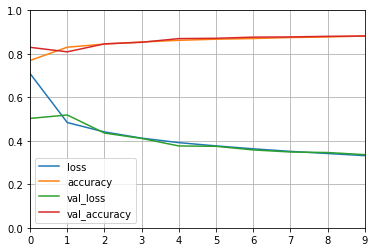

In [20]:
# fit()메서드가 반환하는 history 객체에는 훈련파라미터(history.params), 수행된 에포크 리스트(history.epoch)가 포함된다.
# histort.history는 에포크가 끝날 때마다 훈련 세트와 검증 세트에 대한 손실과 측정한 지표를 담은 딕셔너리이다.

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3756 - accuracy: 0.8659


[0.3756352069377899, 0.8659]

## 예측

In [22]:
# 첫 세개의 샘플에 대해 각 클래스에 속할 확률 추정
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.08, 0.  , 0.89],
       [0.  , 0.  , 0.96, 0.  , 0.01, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
import numpy as np

Text(0.5, 1.0, 'Pullover')

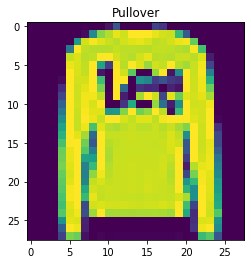

In [24]:
i=1
plt.imshow(X_test[i])
plt.title(class_names[np.argmax(model.predict(np.array([X_test[i]])))])

In [25]:
# predict는 확률을 반환
# predict_classes는 클래스를 반환

y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')